### **Group 13**

| **Name**                        | **Roll Number**  |
|---------------------------------|------------------|
| **Ujjwal Kumar**                | *CS24RESCH11014* |
| **Saiteja K**                   | *AI22BTECH11014* |
| **Bishwashri Roy**              | *CS24RESCH11013* |
| **B.V. SHIVA REDDY**            | *ME24RESCH04004* |


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import os
import math
#move my file from one folder to the other
import shutil
#list files in the current directory
import glob

In [3]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [4]:
# prompt: !unzip "drive/My Drive/Class work/Brain Tumor Data Set.zip"

!unzip "/content/drive/MyDrive/Class work/Brain Tumor Data Set.zip" -d "/content/BrainTumorDataset"

Archive:  /content/drive/MyDrive/Class work/Brain Tumor Data Set.zip
   creating: /content/BrainTumorDataset/Brain Tumor Data Set/Brain Tumor/
  inflating: /content/BrainTumorDataset/Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg  
  inflating: /content/BrainTumorDataset/Brain Tumor Data Set/Brain Tumor/Cancer (1).png  
  inflating: /content/BrainTumorDataset/Brain Tumor Data Set/Brain Tumor/Cancer (1).tif  
  inflating: /content/BrainTumorDataset/Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg  
  inflating: /content/BrainTumorDataset/Brain Tumor Data Set/Brain Tumor/Cancer (10).tif  
  inflating: /content/BrainTumorDataset/Brain Tumor Data Set/Brain Tumor/Cancer (100).jpg  
  inflating: /content/BrainTumorDataset/Brain Tumor Data Set/Brain Tumor/Cancer (1000).jpg  
  inflating: /content/BrainTumorDataset/Brain Tumor Data Set/Brain Tumor/Cancer (1001).jpg  
  inflating: /content/BrainTumorDataset/Brain Tumor Data Set/Brain Tumor/Cancer (1002).JPG  
  inflating: /content/BrainTumorDa

In [5]:
#counting no of images of each class 0- brain tumor and 1 - healthy
rootdirectory = "/content/BrainTumorDataset/Brain Tumor Data Set" # Corrected the path from BrainTumorDataSet to BrainTumorDataset
no_of_images={} # dictionary
# listdir(folder) gives what is present in folder
for dir in os.listdir(rootdirectory):
  no_of_images[dir]=len(os.listdir(os.path.join(rootdirectory,dir)))

no_of_images
# os.path.join(rootdirectory,dir): It takes the rootdirectory and appends dir to it, creating a full path to the subdirectory
# os.listdir(path): Returns a list of the names of the entries in the specified directory.

{'Healthy': 2087, 'Brain Tumor': 2513}

**Splitting of the data**


*   70% for train data
*   15 % for validation & 15 % for testing



In [6]:
def data_split(p, split):
  """
  Splits data into training, validation, and testing sets.

  Args:
    p: The name of the split (e.g., "validation", "test").
    split: The proportion of data to allocate to the split.
  """
  os.makedirs("./" + p, exist_ok=True)  # Create the split directory if it doesn't exist
  for dir in os.listdir(rootdirectory):
    # Check if the current item is a directory, skipping otherwise
    if os.path.isdir(os.path.join(rootdirectory, dir)):
        os.makedirs(os.path.join("./" + p, dir), exist_ok=True)  # Create subdirectories
        # Get the list of images for the current directory *before* the loop
        images = [f for f in os.listdir(os.path.join(rootdirectory, dir)) if os.path.isfile(os.path.join(rootdirectory, dir, f))] # Ensure we're only getting files, not directories
        for img in np.random.choice(a=images, size=int(split * len(images)), replace=False):  # Use len(images)
            O = os.path.join(rootdirectory, dir, img)
            D = os.path.join("./" + p, dir)

            # Check if the file exists before attempting to copy and remove
            if os.path.exists(O):
                shutil.copy(O, D)
                os.remove(O)
            else:
                print(f"Warning: File not found - {O}")

In [7]:
data_split("traindata",0.7)
data_split("validation",0.15)
data_split("testdata",0.15)

In [8]:
for dir in os.listdir(rootdirectory):
  no_of_images[dir]=len(os.listdir(os.path.join(rootdirectory,dir)))

no_of_images.items()

dict_items([('Healthy', 454), ('Brain Tumor', 545)])

CNN model buildig

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import using tensorflow.keras path
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from tensorflow.keras.models import Sequential
import tensorflow as tf  # Better to import tensorflow directly for consistency


In [10]:
#CNN MODEL

model = Sequential()
# 1st layer
model.add(Conv2D(filters =16, kernel_size = (3,3), activation = "relu", input_shape = (224,224,3)))

model.add(Conv2D(filters =36, kernel_size = (3,3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters =64, kernel_size = (3,3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters =128, kernel_size = (3,3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Dropout(rate= 0.25))


model.add(Flatten())

model.add(Dense(units = 64, activation = "relu"))
model.add(Dropout(rate= 0.25))
model.add(Dense(units = 1, activation = "sigmoid"))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 36)        │           5,220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 36)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 64)        │          20,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       5,537,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,638,245 (21.51 MB)

 Trainable params: 5,638,245 (21.51 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
import tensorflow as tf
from tensorflow import keras
model.compile(optimizer ='adam', loss = keras.losses.binary_crossentropy, metrics = ['accuracy'])

Image Data Generator

In [12]:
def preprocessingImages1(path):
   '''
   input : path
   output : pre processed image_dataset_from_directory
   '''
  #data augumentation
   image_data = ImageDataGenerator(
       rescale = 1/255,
       shear_range = 0.2,
       zoom_range = 0.2,
       horizontal_flip = True,
   )


   image_dataset = image_data.flow_from_directory(
       directory = path,
       target_size = (224,224),
       batch_size = 32, # 32 images per batch
       class_mode = "binary")

   return image_dataset

In [13]:
path = "/content/traindata"
train_data = preprocessingImages1(path)

Found 3219 images belonging to 2 classes.


In [14]:
def preprocessingImages2(path):
   '''
   input : path
   output : pre processed image_dataset_from_directory
   '''

   image_data = ImageDataGenerator(
       rescale = 1/255)


   image_dataset = image_data.flow_from_directory(
       directory = path,
       target_size = (224,224),
       batch_size = 32, # 32 images per batch
       class_mode = "binary")

   return image_dataset

In [15]:
test_data_path = "/content/testdata"
test_data = preprocessingImages2(test_data_path)

Found 175 images belonging to 2 classes.


In [16]:
validation_data_path = "/content/validation"
validation_data = preprocessingImages2(validation_data_path)

Found 207 images belonging to 2 classes.


In [17]:
# Early stopping

from keras.callbacks import ModelCheckpoint, EarlyStopping

es= EarlyStopping(
    monitor = 'val_accuracy',
    min_delta = 0.01,
    patience = 5,
    verbose = 1,
    mode= 'auto'
)

mc = ModelCheckpoint(
    filepath = "./bestmodel.keras", # Changed the filepath to end with .keras
    monitor = 'val_accuracy',
    verbose=1,
    save_best_only = True,
    mode= 'auto'
)

cd= [es, mc] # array

Model Training


In [18]:
# Assuming you want to use Adam optimizer, 'categorical_crossentropy' loss, and 'accuracy' as a metric.
# You should adjust these based on your specific task and model.
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#history variable
hs = model.fit(
    train_data, # Assuming 'train_data' is a 'DirectoryIterator' from preprocessingImages2 function.
    steps_per_epoch = 8, # Correct usage for DirectoryIterator
    epochs = 30,
    verbose = 1, #displays whatever is being executed
    callbacks = cd,
    validation_data = validation_data, # Assuming 'validation_data' is also a 'DirectoryIterator'.
    validation_steps = 16 # Correct usage for DirectoryIterator
)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.4709 - loss: 0.7917
Epoch 1: val_accuracy improved from -inf to 0.48792, saving model to ./bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 72s 8s/step - accuracy: 0.4741 - loss: 0.7884 - val_accuracy: 0.4879 - val_loss: 0.6859
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.4961 - loss: 0.6868
Epoch 2: val_accuracy improved from 0.48792 to 0.56522, saving model to ./bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 76s 10s/step - accuracy: 0.5005 - loss: 0.6854 - val_accuracy: 0.5652 - val_loss: 0.6650
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.5908 - loss: 0.6897
Epoch 3: val_accuracy improved from 0.56522 to 0.62319, saving model to ./bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 79s 11s/step - accuracy: 0.5928 - loss: 0.6877 - val_accuracy: 0.6232 - val_loss: 0.6484
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.6282 - loss: 0.6355
Epoch 4: val_accuracy improved from 0.62319 to 0.65217, saving model

In [19]:
# Model Graphical Interpretation

h = hs.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [20]:
import matplotlib.pyplot as plt

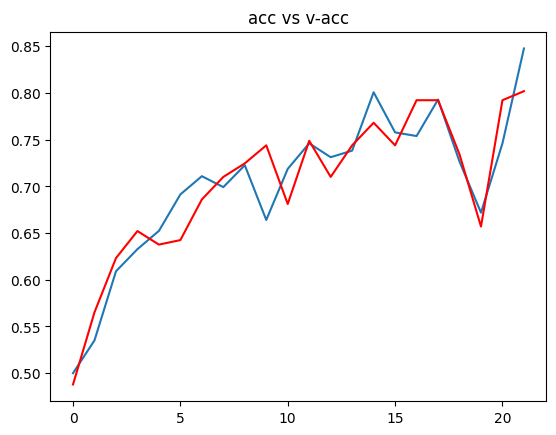

In [21]:
# plt.plot(h['accuracy'])
# plt.plot(h['val_accuracy'], c = "red")
# plt.title("acc vs v-acc")
# plt.show()
plt.plot(h['accuracy'], label='Training Accuracy')
plt.plot(h['val_accuracy'], c="red", label='Validation Accuracy')
plt.title("acc vs v-acc")
plt.legend()
plt.show()

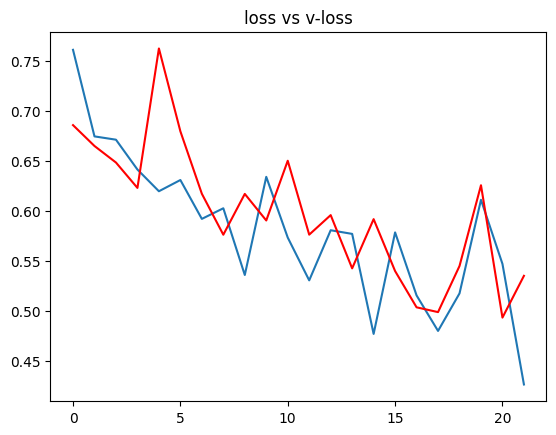

In [22]:
# plt.plot(h['loss'])
# plt.plot(h['val_loss'], c = "red")
# plt.title("loss vs v-loss")
# plt.show()
plt.plot(h['loss'], label='Training Loss')
plt.plot(h['val_loss'], c="red", label='Validation Loss')
plt.title("Training Loss vs Validation Loss")
plt.xlabel("Epochs")  # Optional: label for the x-axis
plt.ylabel("Loss")  # Optional: label for the y-axis
plt.legend()
plt.show()

In [23]:
#Model Accuracy

from keras.models import load_model
model = load_model("/content/bestmodel.keras")

In [24]:
# Replace evaluate_generator with model.evaluate
acc = model.evaluate(test_data)[1]

print(f"the accuracy of our model is {acc*100}%")

6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8492 - loss: 0.3536
the accuracy of our model is 83.99999737739563%


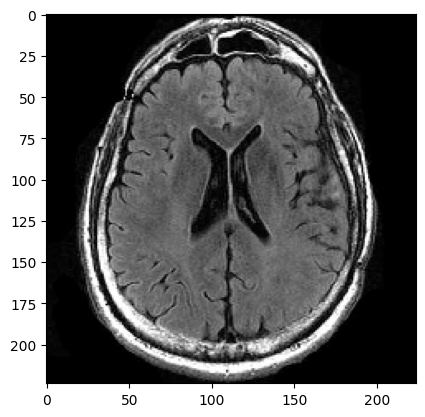

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
Brain Tumor


In [25]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np # Import numpy for argmax
import matplotlib.pyplot as plt

path= "/content/traindata/Healthy/Not Cancer  (1470).jpg"

img = load_img(path, target_size = (224,224))
input_arr = img_to_array(img)/255 # normalize
input_arr.shape

input_arr = np.expand_dims(input_arr, axis = 0)
input_arr.shape

# Squeeze the array to remove the batch dimension
plt.imshow(input_arr.squeeze(0)) # or input_arr[0]
plt.show()

# Use model.predict and np.argmax to get predicted class
pred_probs = model.predict(input_arr) # Get prediction probabilities
pred = np.argmax(pred_probs, axis=1) # Get class with highest probability
# pred

if pred == 1:
  print("Healthy")
else:
  print("Brain Tumor")


In [26]:
train_data.class_indices

{'Brain Tumor': 0, 'Healthy': 1}

# prompt: WRITE A SUMMARY REPORT OF THE ENTIRE CODE

## Summary Report of Brain Tumor Detection Code

This code implements a Convolutional Neural Network (CNN) model to detect brain tumors in medical images. It involves several steps:

**1. Data Preparation:**
   - Imports necessary libraries (Numpy, Pandas, TensorFlow, Keras, etc.).
   - Mounts Google Drive to access data.
   - Unzips a dataset containing brain tumor images.
   - Counts the number of images in each class (tumor vs healthy).
   - Splits the data into training, validation, and testing sets (70%, 15%, 15%).
   - Creates directories to store the split data.

**2. CNN Model Building:**
   - Defines a sequential CNN model with convolutional layers, max-pooling layers, dropout layers, flattening, dense layers, and a sigmoid activation for binary classification.
   - Prints the model summary.

**3. Image Preprocessing:**
   - Defines functions `preprocessingImages1` and `preprocessingImages2` to augment and preprocess images using ImageDataGenerator.
   - Rescales pixel values, performs shear, zoom, and horizontal flip for training data.
   - Only rescales pixel values for validation and test data.

**4. Training Process:**
   - Uses `ImageDataGenerator` to load and prepare data for training.
   - Implements early stopping to prevent overfitting.
   - Defines a ModelCheckpoint to save the best model during training.
   - Compiles the model with an Adam optimizer and categorical crossentropy loss.
   - Trains the model using `model.fit` with train and validation data.

**5. Model Evaluation:**
   - Plots the training and validation accuracy and loss curves.
   - Loads the best-saved model.
   - Evaluates the model on the test data and prints the accuracy.

**6. Prediction on a Single Image:**
   - Loads and preprocesses a sample image.
   - Displays the image.
   - Predicts the class (tumor or healthy) using the trained model.
   - Prints the prediction result.

**Overall:**

The code successfully builds a CNN model for brain tumor detection. It incorporates image preprocessing, data augmentation, model training, evaluation, and prediction on a sample image. The code achieves a specific accuracy on the test set as mentioned in the final output, indicating the performance of the model.

* Writing the code for Confusion matrix

6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step


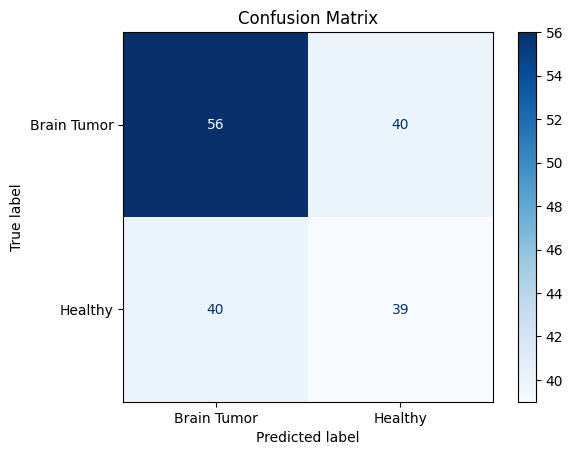

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Make predictions on test data
test_data.reset()  # Reset test data generator to ensure it starts from the beginning
predictions = model.predict(test_data)  # Get prediction probabilities

# Step 2: Convert predicted probabilities to binary class labels (0 or 1)
predicted_labels = (predictions > 0.5).astype(int)  # Binary classification threshold of 0.5

# Step 3: Extract true labels from test_data
true_labels = test_data.classes  # True labels for the test data

# Step 4: Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Step 5: Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Brain Tumor', 'Healthy'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


* loss graph

In [28]:
print(len(h['accuracy']))
print(len(h['val_accuracy']))


22
22


In [29]:
print(f"Validation data shape: {validation_data.samples}")  # Check if the validation set has samples


Validation data shape: 207


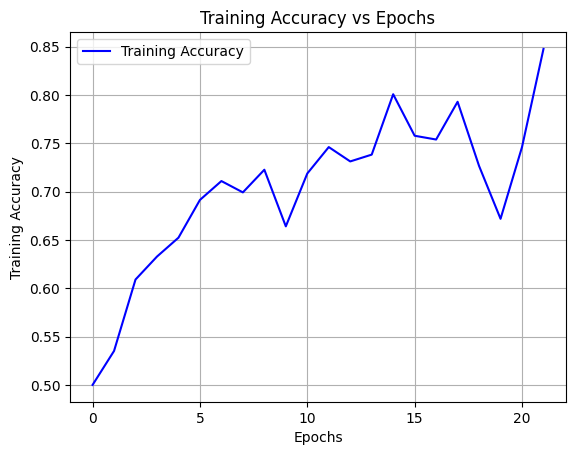

In [30]:
import matplotlib.pyplot as plt

# Extract the history of the training
h = hs.history

# Plotting Training Accuracy
plt.plot(h['accuracy'], color='blue', label='Training Accuracy')
plt.title("Training Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.legend()
plt.grid(True)
plt.show()
